<a href="https://colab.research.google.com/github/mashyko/LSTM_RNN/blob/master/LSTM_nikkei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

時系列予測：日経平均株価の例

In [0]:
! git clone https://github.com/mashyko/LSTM_RNN
%cd LSTM_RNN

Cloning into 'LSTM_RNN'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.
/content/LSTM_RNN


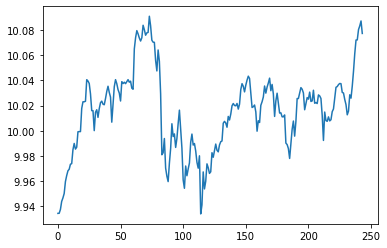

In [0]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
dataframe = pandas.read_csv('data/nikkei_data.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float64')
plt.plot(dataset)
plt.show()

In [0]:
import matplotlib.pyplot as plt
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
#from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
# fix random seed for reproducibility
np.random.seed(7)

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


170 74


In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, maxlen):
    dataX, dataY = [], []
    for i in range(len(dataset)-maxlen-1):
#        a = dataset[i:(i+look_back), 0]
        dataX.append(dataset[i:(i+maxlen),0])
        dataY.append(dataset[i + maxlen,0])
    return np.array(dataX), np.array(dataY)


In [0]:
# reshape into X=t,t-1,t-2 and Y=t+1
maxlen =20

trainX, trainY = create_dataset(train, maxlen)
testX, testY = create_dataset(test, maxlen)

In [0]:
print (trainX.shape[0])
print (trainX.shape[1])
print (trainY.shape[0])

print (trainX[:10,:])
print (trainY[:10])

149
20
149
[[0.00271726 0.00330386 0.02245822 0.0631939  0.08083054 0.10318814
  0.1638088  0.19394941 0.21803536 0.22606728 0.25149005 0.25419714
  0.32472687 0.35649396 0.32794498 0.33737105 0.41557706 0.41650876
  0.41649124 0.53356416]
 [0.00330386 0.02245822 0.0631939  0.08083054 0.10318814 0.1638088
  0.19394941 0.21803536 0.22606728 0.25149005 0.25419714 0.32472687
  0.35649396 0.32794498 0.33737105 0.41557706 0.41650876 0.41649124
  0.53356416 0.5672811 ]
 [0.02245822 0.0631939  0.08083054 0.10318814 0.1638088  0.19394941
  0.21803536 0.22606728 0.25149005 0.25419714 0.32472687 0.35649396
  0.32794498 0.33737105 0.41557706 0.41650876 0.41649124 0.53356416
  0.5672811  0.5672811 ]
 [0.0631939  0.08083054 0.10318814 0.1638088  0.19394941 0.21803536
  0.22606728 0.25149005 0.25419714 0.32472687 0.35649396 0.32794498
  0.33737105 0.41557706 0.41650876 0.41649124 0.53356416 0.5672811
  0.5672811  0.56988807]
 [0.08083054 0.10318814 0.1638088  0.19394941 0.21803536 0.22606728
  0.251

In [0]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX[:10,:])


[[[0.00271726 0.00330386 0.02245822 0.0631939  0.08083054 0.10318814
   0.1638088  0.19394941 0.21803536 0.22606728 0.25149005 0.25419714
   0.32472687 0.35649396 0.32794498 0.33737105 0.41557706 0.41650876
   0.41649124 0.53356416]]

 [[0.00330386 0.02245822 0.0631939  0.08083054 0.10318814 0.1638088
   0.19394941 0.21803536 0.22606728 0.25149005 0.25419714 0.32472687
   0.35649396 0.32794498 0.33737105 0.41557706 0.41650876 0.41649124
   0.53356416 0.5672811 ]]

 [[0.02245822 0.0631939  0.08083054 0.10318814 0.1638088  0.19394941
   0.21803536 0.22606728 0.25149005 0.25419714 0.32472687 0.35649396
   0.32794498 0.33737105 0.41557706 0.41650876 0.41649124 0.53356416
   0.5672811  0.5672811 ]]

 [[0.0631939  0.08083054 0.10318814 0.1638088  0.19394941 0.21803536
   0.22606728 0.25149005 0.25419714 0.32472687 0.35649396 0.32794498
   0.33737105 0.41557706 0.41650876 0.41649124 0.53356416 0.5672811
   0.5672811  0.56988807]]

 [[0.08083054 0.10318814 0.1638088  0.19394941 0.21803536 0.22

In [0]:
# create and fit the LSTM network

#input_shape=(1, maxlen)

model = Sequential()
model.add(LSTM(20, input_shape=(1, maxlen)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
149/149 - 0s - loss: 0.0800
Epoch 2/100
149/149 - 0s - loss: 0.0243
Epoch 3/100
149/149 - 0s - loss: 0.0168
Epoch 4/100
149/149 - 0s - loss: 0.0132
Epoch 5/100
149/149 - 0s - loss: 0.0110
Epoch 6/100
149/149 - 0s - loss: 0.0094
Epoch 7/100
149/149 - 0s - loss: 0.0093
Epoch 8/100
149/149 - 0s - loss: 0.0080
Epoch 9/100
149/149 - 0s - loss: 0.0076
Epoch 10/100
149/149 - 0s - loss: 0.0067
Epoch 11/100
149/149 - 0s - loss: 0.0065
Epoch 12/100
149/149 - 0s - loss: 0.0065
Epoch 13/100
149/149 - 0s - loss: 0.0063
Epoch 14/100
149/149 - 0s - loss: 0.0071
Epoch 15/100
149/149 - 0s - loss: 0.0060
Epoch 16/100
149/149 - 0s - loss: 0.0061
Epoch 17/100
149/149 - 0s - loss: 0.0054
Epoch 18/100
149/149 - 0s - loss: 0.0055
Epoch 19/100
149/149 - 0s - loss: 0.0058
Epoch 20/100
149/149 - 0s - loss: 0.0054
Epoch 21/100
149/149 - 0s - loss: 0.0055
Epoch 22/100
149/149 - 0s - loss: 0.0049
Epoch 23/100
149/149 - 0s - loss: 0.0049
Epoch 24/100
149/149 - 0s - loss: 0.0051
Epoch 25/100
149/149 - 0s

In [0]:
# 予想を遂行する
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# 予測を invert する
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# 平方平均二乗誤差 (RMSE, root mean squared error) を計算する
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


http://tekenuko.hatenablog.com/entry/2017/07/25/005348

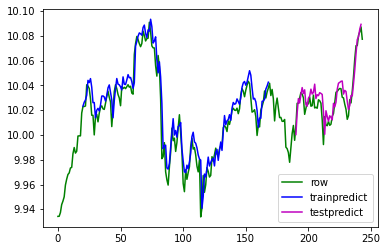

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[maxlen:len(trainPredict)+maxlen, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(maxlen*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color ="g", label = "row")
plt.plot(trainPredictPlot,color="b", label="trainpredict")
plt.plot(testPredictPlot,color="m", label="testpredict")

plt.legend()
plt.show()